In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import cluster
from scipy.spatial import distance
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [107]:
data = pd.read_csv('dengue.csv')
data = data.dropna()
X = data[['humid', 'temp' , 'h10pix', 'trees' , 'Xmin', 'Ymin']]
X = np.asarray(X)

In [108]:
score = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    a = kmeans.score(X)
    score.append(a)
clus = np.linspace(1,10,9)
print(len(score))

10


Text(0.5, 1.0, 'Score no nos dice que numero de cluster es mejor')

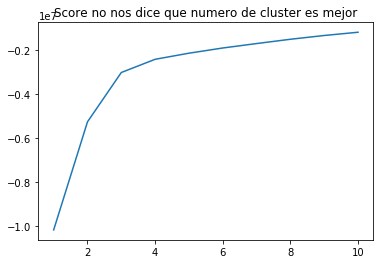

In [109]:
clus = np.linspace(1,10,10)
plt.plot(clus,score)
plt.title('Score no nos dice que numero de cluster es mejor')

In [110]:
def mi_bic(kmeans,X):

    centros = [kmeans.cluster_centers_]
    labels  = kmeans.labels_

    m = kmeans.n_clusters

    n = np.bincount(labels)

    x, d = X.shape
    

    cl_var = [(1.0 / (n[i] - m)) * sum(distance.cdist(X[np.where(labels == i)], [centros[0][i]], 'euclidean')**2)  for i in range(m)]

    const_term = 0.5 * m * np.log10(x) * (d+1)

    BIC = np.sum([n[i] * np.log10(n[i]) -n[i] * np.log10(x) - ((n[i] * d) / 2) * np.log10(2*np.pi*int(cl_var[i])) - ((n[i] - m) * d/ 2) for i in range(m)]) - const_term

    return(BIC)



clusterss = range(1,15)

KMeans = [cluster.KMeans(n_clusters = i, init="k-means++").fit(X) for i in clusterss]
BIC = [mi_bic(kmeansi,X) for kmeansi in KMeans]
BIC = np.asarray(BIC)
BIC = abs(BIC)

Text(0, 0.5, 'BIC')

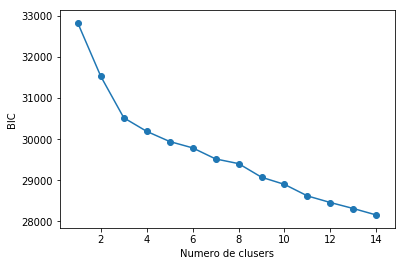

In [111]:
plt.plot(clusterss,BIC)
plt.scatter(clusterss,BIC)
plt.xlabel('Numero de clusers')
plt.ylabel('BIC')

In [112]:
datos =pd.read_csv('BreadBasket_DMS.csv').dropna()

In [113]:
print(datos)

             Date      Time  Transaction                  Item
0      2016-10-30  09:58:11            1                 Bread
1      2016-10-30  10:05:34            2          Scandinavian
2      2016-10-30  10:05:34            2          Scandinavian
3      2016-10-30  10:07:57            3         Hot chocolate
4      2016-10-30  10:07:57            3                   Jam
5      2016-10-30  10:07:57            3               Cookies
6      2016-10-30  10:08:41            4                Muffin
7      2016-10-30  10:13:03            5                Coffee
8      2016-10-30  10:13:03            5                Pastry
9      2016-10-30  10:13:03            5                 Bread
10     2016-10-30  10:16:55            6             Medialuna
11     2016-10-30  10:16:55            6                Pastry
12     2016-10-30  10:16:55            6                Muffin
13     2016-10-30  10:19:12            7             Medialuna
14     2016-10-30  10:19:12            7               

In [114]:
item = datos['Item'].values
item = np.asarray(item)
le = preprocessing.LabelEncoder()
le.fit(item)
item_new = le.transform(item)
day = ['Day']
hour = ['Hour']
month = ['Month']
year = ['Year']

Date = datos['Date'][1:]
Time = datos['Time'][1:]
for i in (Date):
    a = i.split('-')
    year.append(a[0])
    month.append(a[1])
    day.append(a[2])
for i in (Time):
    a= i.split(':')
    hour.append(str(a[0])+str(a[1]))
xx = np.array([day[1:],hour[1:],month[1:],year[1:],item_new[1:]])
xx = xx.T

In [115]:
print(xx)

[['30' '1005' '10' '2016' '75']
 ['30' '1005' '10' '2016' '75']
 ['30' '1007' '10' '2016' '48']
 ...
 ['09' '1457' '04' '2017' '23']
 ['09' '1457' '04' '2017' '66']
 ['09' '1504' '04' '2017' '78']]


In [116]:
pca = PCA(n_components=2)
FIT= pca.fit_transform(xx)

In [117]:
print(FIT)

[[ 249.568734     36.83010368]
 [ 249.568734     36.83010368]
 [ 247.70588339    9.82033888]
 ...
 [-202.17437424  -17.45177911]
 [-202.39275393   25.54758881]
 [-249.45305651   37.3086127 ]]


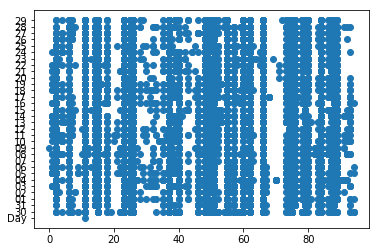

In [118]:
plt.scatter(item_new,day)


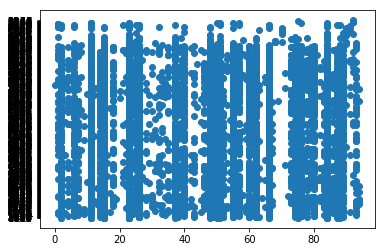

In [119]:
plt.scatter(item_new,hour)

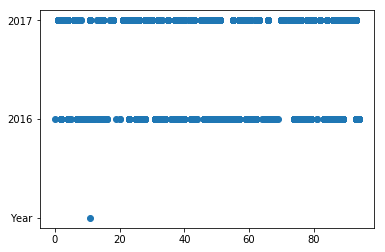

In [120]:
plt.scatter(item_new,year)

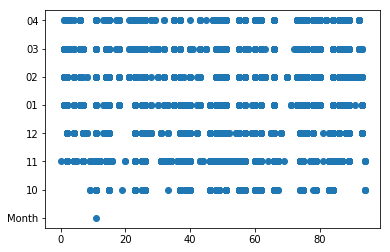

In [123]:
plt.scatter(item_new,month)

[[ 2.96350787e-04 -1.14811084e-04]
 [-9.99986371e-01 -5.08084486e-03]
 [ 1.16681736e-03 -1.87583398e-03]
 [-1.31559205e-04  2.28665873e-04]
 [-5.07859740e-03  9.99985300e-01]]


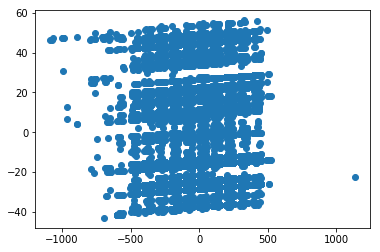

In [124]:
x_new = FIT[:,0]
y_new = FIT[:,1]
vectors = pca.components_.T
print(vectors)
plt.scatter(x_new,y_new)

In [126]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(xx)

TypeError: 'list' object is not callable